# Polymer Benchmarking
Hans Gaensbauer, Evan Coleman, Glen Juror for the MIT Climate and Sustainability Consortium </br>3-7-2023

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from NMR import JEOL_parser as jeol

In [10]:
dlen = 39328
zero_point = 0
base_freq = 0

numfiles = 10
folder = "../data/nmr_data/polymer-benchmarking/"
samples = [
    "PAL-1-DMSO",
    "PEG-1-DMSO",
    "PEG-0_4-water",
    "PEG-04-water",
    "PEG-40-water"
]

data = np.zeros((numfiles, dlen), dtype = np.complex128)
for i in range(int(numfiles/2)):
    filename_512 = (folder + samples[i] + "_CARBON-2-1-512.jdf")
    filename_2048 = (folder + samples[i] + "_CARBON-2-1-2048.jdf")
    data[2*i] = jeol.get_1d_data(filename_512)
    data[2*i+1] = jeol.get_1d_data(filename_2048)
    
header = jeol.get_header(filename_512)

zero_point = jeol.get_header(filename_512)["Zero_Point"][0]
base_freq = jeol.get_header(filename_512)["Base_Freq"][0]
    
t = jeol.get_ruler(filename_512)

<IPython.core.display.Javascript object>


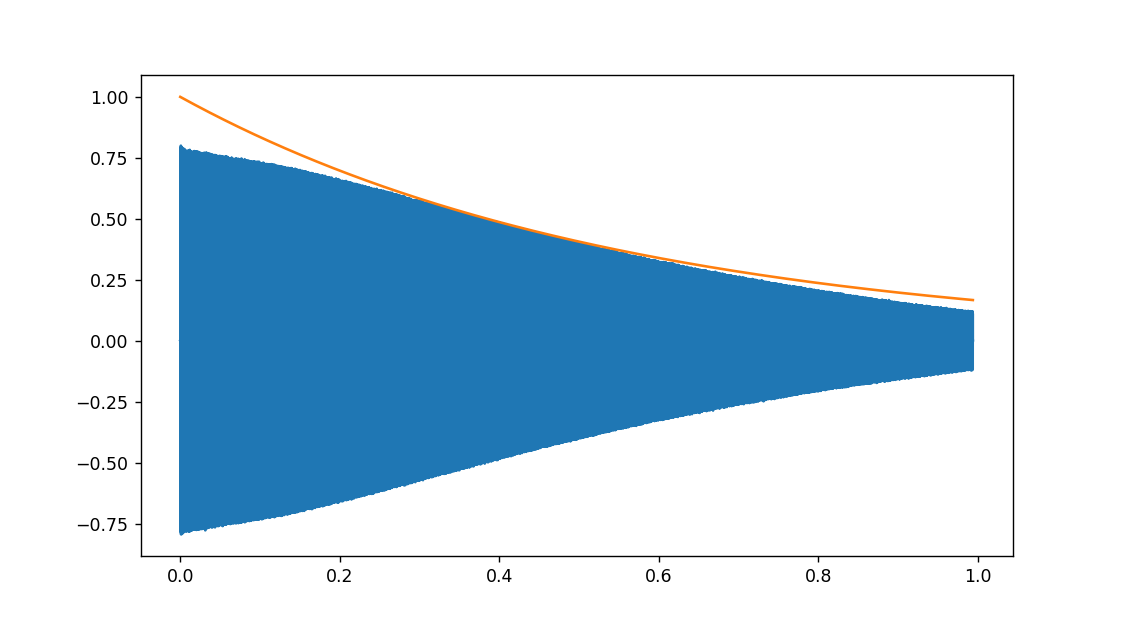

In [11]:
#Set the spectral width
sexp = np.exp(-1.8*(t-t[0]))

#plot the exponential with one of the FIDs
sexp_plot = plt.figure(figsize=(9,5))
plt.plot(t, 0.8*np.real(data[0])/np.real(data[0]).max())
plt.plot(t, sexp)

<IPython.core.display.Javascript object>


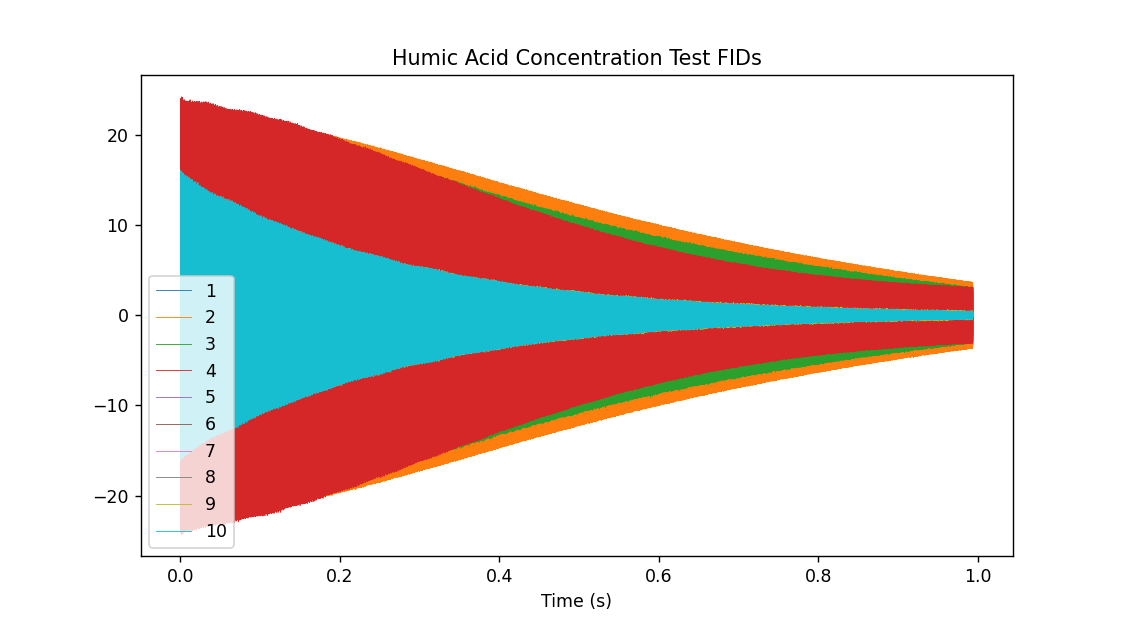

In [12]:
#plim = 128

#plot the FIDs
fid_plot = plt.figure(figsize=(9,5))
for i in range(numfiles):
    plt.plot(t[:], np.real(data[i][:]), linewidth=0.5)
    
plt.legend([("%d" % (i+1)) for i in range(numfiles)])
#plt.ylim([0.1, -0.1])
plt.title("Humic Acid Concentration Test FIDs")
plt.xlabel("Time (s)")
plt.show()

In [13]:
spectra = np.zeros((numfiles, dlen), dtype = np.complex128)
ppm = np.zeros((numfiles, dlen))

#Create Spectra
for i in range(numfiles):
    spectra[i] = np.fft.fft(data[i] * sexp)
    ppm[i] = (zero_point/(t[1]-t[0]) - np.fft.fftfreq(len(data[i]), t[1]-t[0]))/base_freq #Convert to ppm

<IPython.core.display.Javascript object>


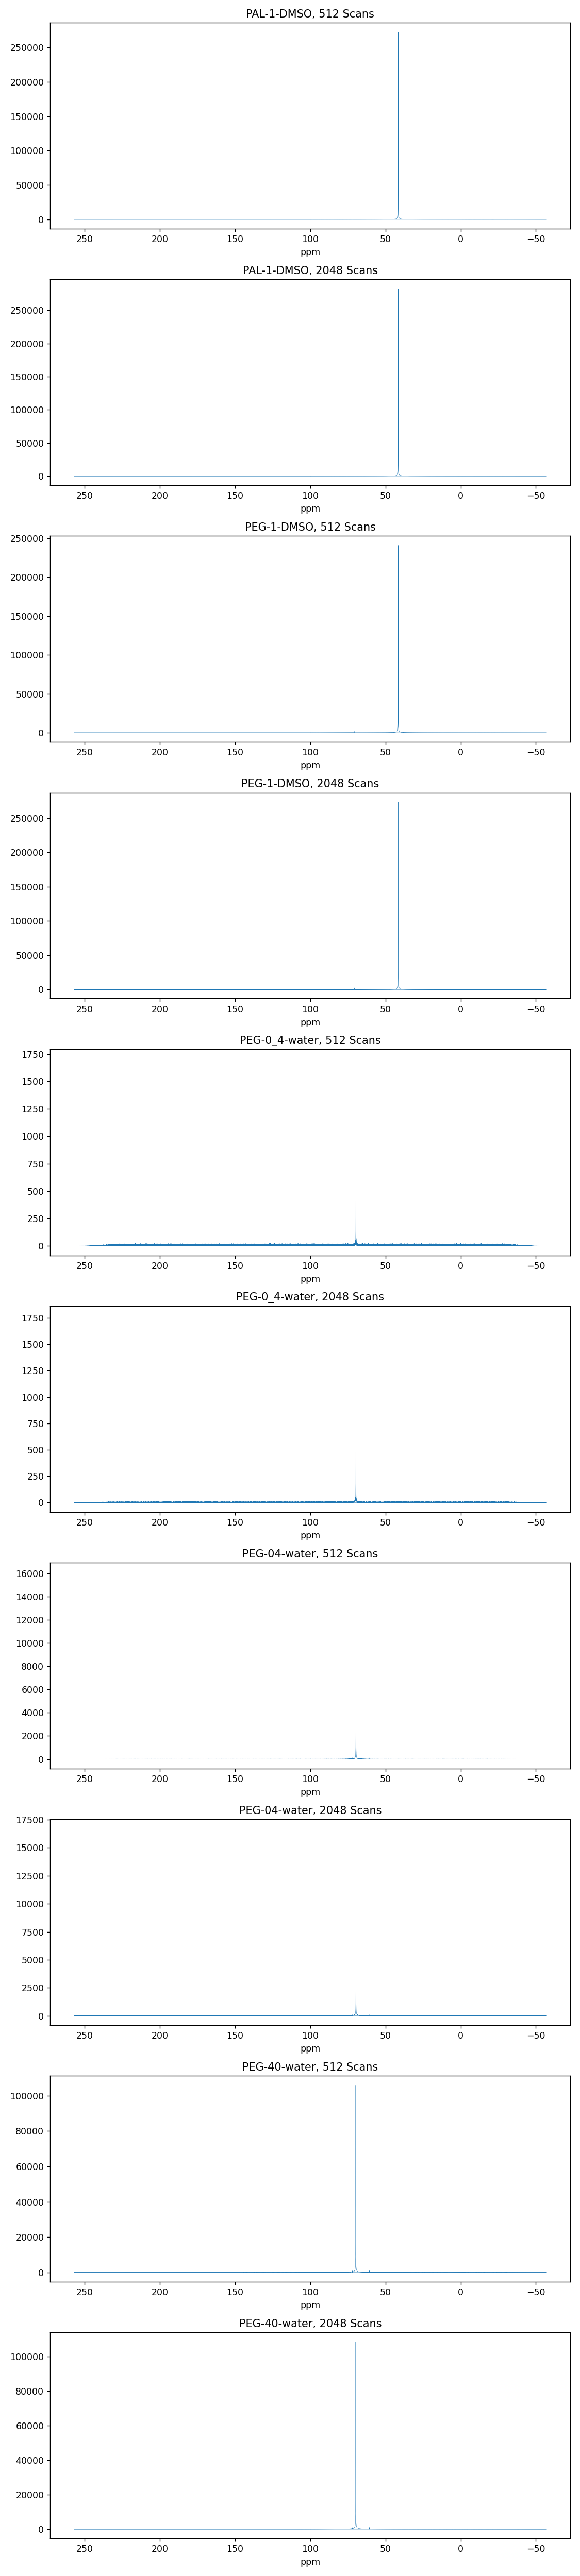

In [14]:
spec_plot, ax = plt.subplots(numfiles,1,figsize=(9,4*numfiles))
for i in range(numfiles):
    ax[i].plot(ppm[i], np.abs(spectra[i]), linewidth=0.35)
    ax[i].invert_xaxis()
    ax[i].set_xlabel("ppm")
    ax[i].title.set_text(samples[int(i/2)] + ", " + ("2048" if (i%2) else "512") + " Scans")
plt.xlabel("ppm")
plt.tight_layout()
plt.show()

In [15]:
snr = np.empty(numfiles - 2)
for i in range(2, numfiles):
    snr[i-2] = np.max(np.abs(spectra[i][3500:4250]))/np.sqrt(np.mean(np.abs(spectra[i][5000:5200])**2))

<IPython.core.display.Javascript object>


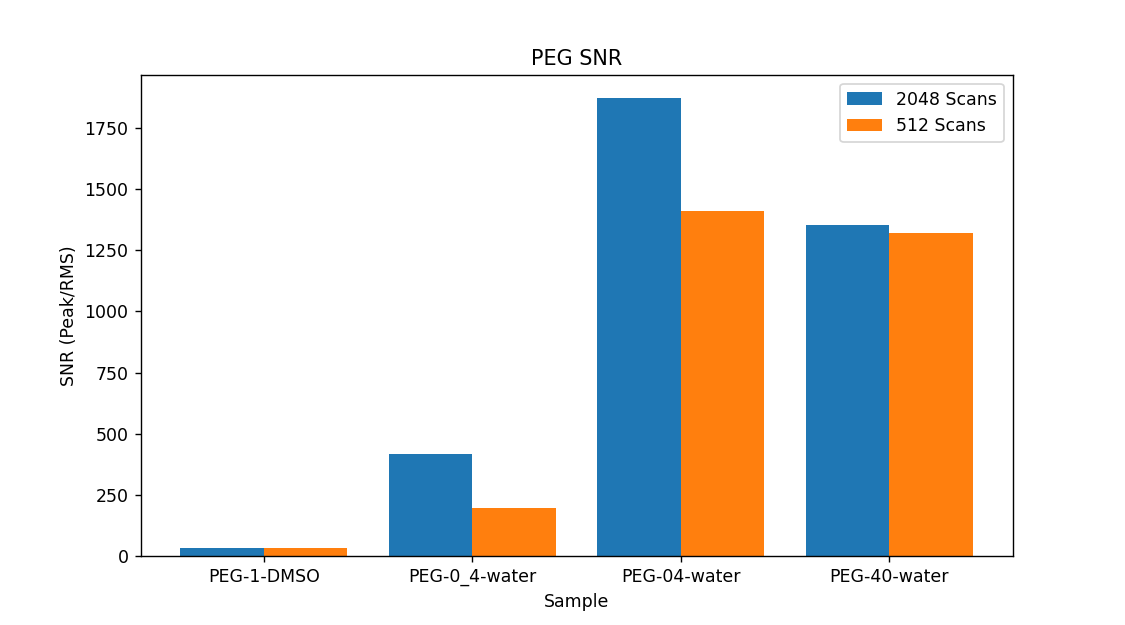

In [16]:
snrfig = plt.figure(figsize=(9,5))
xaxis = np.arange(int((numfiles-2)/2))
plt.bar(xaxis-0.2, snr[1::2], width=0.4, label="2048 Scans")
plt.bar(xaxis+0.2, snr[0::2], width=0.4, label="512 Scans")
plt.xticks(xaxis, samples[1:])
plt.ylabel("SNR (Peak/RMS)")
plt.xlabel("Sample")
plt.title("PEG SNR")
plt.legend()
plt.show()